In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
l1 = ['PassengerId','Ticket','Cabin']
df.drop(l1,axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
temp = df['Name'].unique()

In [ ]:
df.shape,temp.shape

((891, 9), (891,))

In [ ]:
st = []
for i in temp:
  a = i.split(' ')
  for  k in a:
    if '.' in k:
      st.append(k)
      break

In [ ]:
st = np.array(st)

In [ ]:
df["New_Name"] = st

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.


In [ ]:
df.drop(['Name'],axis = 1,inplace =True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
New_Name      0
dtype: int64

In [ ]:
embarked =list(df['Embarked'].mode())

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(embarked[0],inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
New_Name    0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le_S = LabelEncoder()
le_E = LabelEncoder()
le_N = LabelEncoder()

In [ ]:
df['Sex'] = le_S.fit_transform(df['Sex'])
df['Embarked'] = le_E.fit_transform(df['Embarked'])
df['New_Name'] = le_N.fit_transform(df['New_Name'])

In [ ]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.1,random_state = 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((801, 8), (90, 8), (801,), (90,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=40,max_depth=10,max_leaf_nodes=5,oob_score=True)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = clf.predict(x_train[0].reshape(-1,1))
clf.score(x_train,y_train)*100


ValueError: ignored

In [ ]:
print(pred)

[[-1.60703355  0.73510857 -0.0098455  ... -0.63579689  0.577227
   0.41311006]
 [ 0.80803938  0.73510857 -0.83128296 ... -0.47501012  0.577227
   0.41311006]
 [-0.39949708  0.73510857 -2.05970196 ... -0.10634377  0.577227
  -1.80770309]
 ...
 [ 0.80803938  0.73510857 -0.0098455  ... -0.47831921 -0.70354538
   0.41311006]
 [ 0.80803938 -1.36034327  0.47391222 ... -0.28147057  0.577227
   0.96831335]
 [-0.39949708  0.73510857  2.31654071 ...  0.15838279  0.577227
   0.41311006]]


In [ ]:
clf.score(x_test,y_test)*100

81.11111111111111

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_train))

[[438  88]
 [ 60 215]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_train))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       526
           1       0.71      0.78      0.74       275

    accuracy                           0.82       801
   macro avg       0.79      0.81      0.80       801
weighted avg       0.82      0.82      0.82       801



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,x_train,y_train,cv=3,n_jobs=-1).mean()*100

79.65043695380774

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {
    "n_estimators":[0,20,40,50,100,500],
    "criterion":['gini','entropy'],
    "max_depth":[0,3,10,15,20,15],
    "max_leaf_nodes":[0,2,3,4,5],
    "oob_score":[True,False]
}

In [ ]:
clf_grid = GridSearchCV(estimator=clf,param_grid=param,cv=3,n_jobs=-1)
clf_grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=5,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=40, n_jobs=None,
                                              oob_score=True, random_state=None,
                                       

In [ ]:
clf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 5,
 'n_estimators': 40,
 'oob_score': False}

#AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=40,learning_rate=0.3)
clf_ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.3,
                   n_estimators=40, random_state=None)

In [ ]:
pred_ada = clf_ada.predict(x_train)
clf_ada.score(x_train,y_train)*100

82.02247191011236

In [ ]:
clf_ada.score(x_test,y_test)*100

82.22222222222221

In [ ]:
print(confusion_matrix(pred_ada,y_train))

[[434  80]
 [ 64 223]]


In [ ]:
print(classification_report(pred_ada,y_train))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       514
           1       0.74      0.78      0.76       287

    accuracy                           0.82       801
   macro avg       0.80      0.81      0.81       801
weighted avg       0.82      0.82      0.82       801



In [ ]:
cross_val_score(clf_ada,x_train,y_train,cv=10).mean()*100

80.52932098765432

In [ ]:
param = {
    "n_estimators":[0,1,5,10,20,30,40],
    "learning_rate":[0.1,0.3,1]
}

In [ ]:
clf_grid = GridSearchCV(estimator=clf_ada,param_grid=param,n_jobs=-1,cv=3)
clf_grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=0.3, n_estimators=40,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 1],
                         'n_estimators': [0, 1, 5, 10, 20, 30, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf_grid.best_params_

{'learning_rate': 1, 'n_estimators': 40}

In [ ]:
clf_grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.9,
                   n_estimators=40, random_state=None)

In [ ]:
clf_grid.best_score_*100

81.64794007490637

#XGBCBoost

In [ ]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(n_estimators=15,n_jobs=-1,learning_rate=0.2)
clf_xgb.fit(x_train,y_train)

NameError: ignored

In [ ]:
pred_xgb = clf_xgb.predict(x_train)
clf_xgb.score(x_train,y_train)*100

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
clf_xgb.score(x_test,y_test)*100

In [ ]:
print(confusion_matrix(pred_xgb,y_train))

In [ ]:
print(classification_report(pred_xgb,y_train))

In [ ]:
cross_val_score(clf_xgb,x_train,y_train,cv=10).mean()*100

In [ ]:
param2 = {
    "n_estimators":[1,5,10,20,30],
    "learning_rate":[0.1,0.2,0.3,0.5]
}

In [ ]:
clf_grid = GridSearchCV(estimator=clf_xgb,param_grid=param2,n_jobs=-1,cv=3)
clf_grid.fit(x_train,y_train)

In [ ]:
clf_grid.best_params_

#ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=32,activation='relu',input_shape=(8,)))
model.add(Dropout(rate=0.2))

In [ ]:
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(rate=0.2))

In [ ]:
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,batch_size=128,epochs=100,validation_split=0.1)

Train on 720 samples, validate on 81 samples
Epoch 1/100
720/720 [==============================] - 2s 3ms/step - loss: 0.7056 - accuracy: 0.5208 - val_loss: 0.6704 - val_accuracy: 0.6296
Epoch 2/100
720/720 [==============================] - 0s 32us/step - loss: 0.6733 - accuracy: 0.6333 - val_loss: 0.6471 - val_accuracy: 0.6543
Epoch 3/100
720/720 [==============================] - 0s 32us/step - loss: 0.6410 - accuracy: 0.7069 - val_loss: 0.6243 - val_accuracy: 0.7037
Epoch 4/100
720/720 [==============================] - 0s 31us/step - loss: 0.6122 - accuracy: 0.7306 - val_loss: 0.6013 - val_accuracy: 0.7407
Epoch 5/100
720/720 [==============================] - 0s 33us/step - loss: 0.5792 - accuracy: 0.7667 - val_loss: 0.5807 - val_accuracy: 0.7654
Epoch 6/100
720/720 [==============================] - 0s 32us/step - loss: 0.5799 - accuracy: 0.7597 - val_loss: 0.5612 - val_accuracy: 0.7531
Epoch 7/100
720/720 [==============================] - 0s 31us/step - loss: 0.5389 - accurac

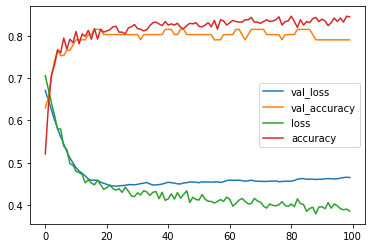

In [ ]:
pd.DataFrame(model.history.history).plot()
plt.show()

In [ ]:
model.evaluate(x_train,y_train)

801/801 [==============================] - 0s 53us/step


[0.3807834391941441, 0.8439450860023499]

In [ ]:
model.evaluate(x_test,y_test)

90/90 [==============================] - 0s 138us/step


[0.3886227932241228, 0.8111110925674438]

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = np.round(y_pred)
y_pred[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[45 11]
 [ 6 28]]


In [ ]:
(45+28)/y_pred.shape[0]*100

81.11111111111111